In [1]:
!pip install camb
!pip install healpy

total
lens_potential
lensed_scalar
unlensed_scalar
unlensed_total
tensor
(2551, 4)


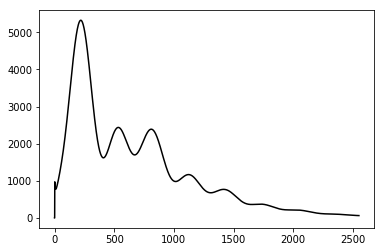

In [2]:
import camb
from camb import model, initialpower
import healpy as hp 
import numpy as np
from pylab import *
rcParams['image.cmap'] = 'jet'

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)


#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)

ls = np.arange(totCL.shape[0])
clf()
plot(ls,totCL[:,0], color='k')


In [3]:
%timeit pars.set_for_lmax(256, lens_potential_accuracy=0); results = camb.get_results(pars)

1 loop, best of 3: 1.86 s per loop


0
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/usr/local/lib/python2.7/dist-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


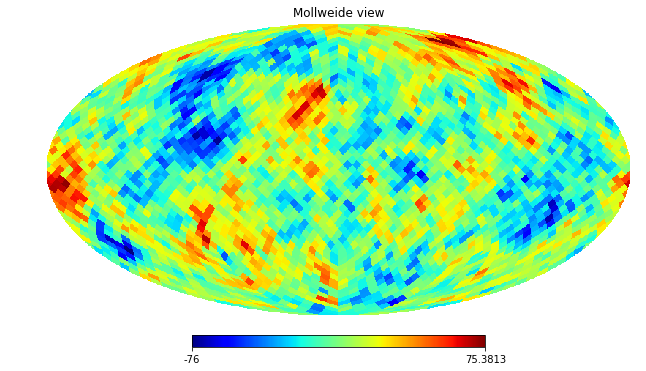

In [4]:
print(ls[0])
CL = totCL[:,0]/ls/(ls+1)
CL[0]=0

ns = 16
map =hp.synfast(CL[0:5*ns], ns, pixwin=False)
hp.mollview(map)

((32,), 32)
((528,), 528)
complex128
[ 2.28422987e-03+0.00000000e+00j  1.10599731e-02+0.00000000e+00j
  6.64255658e+00+0.00000000e+00j  9.18150573e+00+0.00000000e+00j
 -2.36708070e-01+0.00000000e+00j  2.87261847e+00+0.00000000e+00j
 -6.90603667e-01+0.00000000e+00j  4.89475895e+00+0.00000000e+00j
  7.74949482e-01+0.00000000e+00j -1.43361561e+00+0.00000000e+00j
 -2.62686084e+00+0.00000000e+00j -1.60788404e+00+0.00000000e+00j
  1.49207894e+00+0.00000000e+00j  1.70296029e+00+0.00000000e+00j
  6.63423871e-01+0.00000000e+00j -5.58308848e-01+0.00000000e+00j
 -3.14242187e-03+0.00000000e+00j  2.66559632e+00+0.00000000e+00j
  1.22242760e+00+0.00000000e+00j  4.47149049e-02+0.00000000e+00j
 -2.47713126e+00+0.00000000e+00j -2.85305766e+00+0.00000000e+00j
  3.90575474e-01+0.00000000e+00j  9.83189142e-01+0.00000000e+00j
  1.07369102e+00+0.00000000e+00j -1.62957514e-01+0.00000000e+00j
  7.32971791e-01+0.00000000e+00j -3.89508859e-01+0.00000000e+00j
  1.04946355e+00+0.00000000e+00j -2.82847294e-01+0.00

(0, 31)

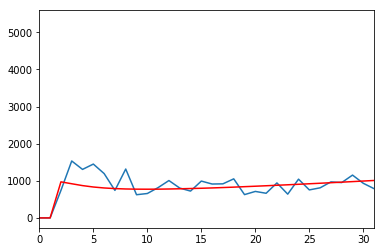

In [5]:
lmax = 2*ns-1
nl = 2*ns
nalm = (2*ns)*(2*ns+1)/2
outcl, outalm = hp.anafast(map,alm=True, lmax=lmax)
print(outcl.shape, nl)
print(outalm.shape, nalm)
print(outalm.dtype)
print(outalm[0:50])
ll = np.arange(outcl.shape[0])
clf()
plot(ll,ll*(ll+1)*outcl)
plot(ls, ls*(ls+1)*CL, 'r')
xlim(0,max(ll))

In [6]:
### Target power spectra
clt = CL[0:nl]
lt = ll[0:nl]

nbmodels = 100000
nnn = int(nbmodels/30)
npixok = 12*ns**2
limit_shape = 3*ns
okpix = np.arange(npixok)
mymaps = np.zeros((nbmodels, npixok))
myalms = np.zeros((nbmodels, nalm), dtype=complex128)
expcls = np.zeros((nbmodels, nl))
mycls = np.zeros((nbmodels, nl))
expcls = np.zeros((nbmodels, nl))
allshapes = np.zeros((nbmodels, len(ls)))
for i in range(nbmodels):
  ylo = np.random.rand()*2
  yhi = np.random.rand()*2
  if (i/nnn)*nnn == i: 
    print(i,ylo,yhi)
  theshape = ylo+(yhi-ylo)/(limit_shape)*ls
  theshape[theshape < 0] = 0
  theshape[limit_shape:] = 0
  allshapes[i,:] = theshape
  theCL = CL*theshape
  themap = hp.synfast(theCL, ns, pixwin=False, verbose=False)
  mymaps[i,:] = themap[okpix]
  expcls[i,:], myalms[i,:] = hp.anafast(themap, lmax=lmax, alm=True)
  mycls[i,:] = theCL[0:nl]


(0, 0.4230471844300414, 0.6290697628352382)
(3333, 0.48554604057408945, 1.5981211593401226)
(6666, 1.2616588196325702, 1.457046954754658)
(9999, 1.0530704200150944, 0.9873980052244726)
(13332, 1.5305147055743202, 0.29014217119673735)
(16665, 0.04675103501692224, 1.0377410287680884)
(19998, 0.7977909771560987, 0.7569939981499543)
(23331, 1.0081685525996738, 1.097161322210634)
(26664, 0.6513073043986908, 1.1077580235987)
(29997, 0.04783044961894256, 1.4144593590796724)
(33330, 1.568624895224293, 1.6673162391019607)
(36663, 0.006837024121278956, 0.21471130167191688)
(39996, 1.4960936076417153, 1.7934521614993815)
(43329, 0.1509064020718931, 0.4644445144503593)
(46662, 1.0393807490130542, 0.9937104939474068)
(49995, 1.9868566349670023, 0.47214330611399347)
(53328, 0.5007349854813841, 0.454518761027326)
(56661, 0.6016092803702828, 1.4881828696048933)
(59994, 1.9921595126871945, 0.08086753408893976)
(63327, 1.6299141017343262, 0.7262349389423282)
(66660, 1.8061948467035158, 0.810682459324037

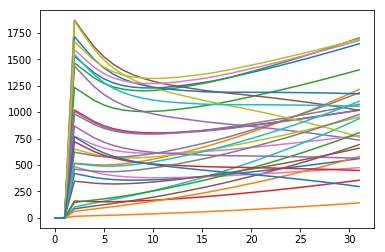

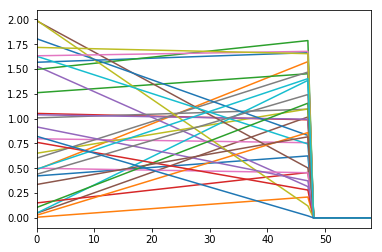

In [7]:
for i in xrange(nbmodels):
  if (i/nnn)*nnn == i:
    plot(lt, lt*(lt+1)*mycls[i,:])
    
figure()
xlim(0,3*ns+10)
for i in xrange(nbmodels):
  if (i/nnn)*nnn == i:
    plot(ls, allshapes[i,:])
    



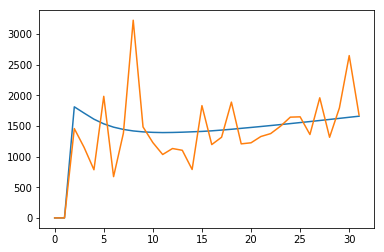

In [8]:
num = np.random.randint(0,nbmodels)
#figure()
#hp.mollview(mymaps[num,:])

figure()
plot(lt, lt*(lt+1)*mycls[num,:])
plot(lt, lt*(lt+1)*expcls[num,:])

In [9]:
### Deep Networks Configuration for the case of alm -> spectra
from tensorflow import keras
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(units=nalm*6, activation='relu', input_dim=nalm, kernel_initializer='uniform'))
#model.add(Dense(units=nalm/2, activation='linear'))
model.add(Dense(units=nl, activation='linear'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Training
fraction = 0.8
ilim = int(nbmodels*fraction)
print(ilim)

mx = np.max(np.abs(myalms))
my = np.max(mycls)

from __future__ import print_function
class PrintNum(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 10 == 0: 
      print('')
      print(epoch, end='')
    sys.stdout.write('.')
    sys.stdout.flush()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


history=model.fit(myalms[0:ilim,:]/mx, mycls[0:ilim]/my, epochs=200, batch_size=1000, validation_split=0.1, verbose=0, callbacks=[early_stop, PrintNum()])

Using TensorFlow backend.
W0704 15:00:09.910759 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 15:00:09.934740 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 15:00:09.942326 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 15:00:09.973759 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



80000


W0704 15:00:12.084533 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0704 15:00:12.170938 139738858497920 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



0..........
10..........
20..........
30....

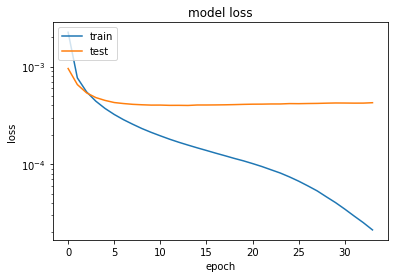

2.1220422114412133e-05 0.0003994022663391661 34


In [10]:
# summarize history for loss
plot(history.history['loss'])
plot(history.history['val_loss'])
title('model loss')
ylabel('loss')
xlabel('epoch')
legend(['train', 'test'], loc='upper left')
yscale('log')
show()
print(min(history.history['loss']), min(history.history['val_loss']), len(history.history['val_loss']))

In [0]:
myalms_test = myalms[ilim:,:]
mycls_test = mycls[ilim:,:]
expcls_test = expcls[ilim:,:]

result = my * model.predict(myalms_test / mx, batch_size=128)

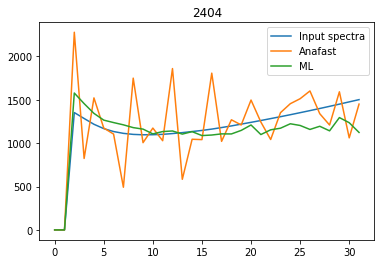

In [12]:
num=np.random.randint(result.shape[0])
plot(lt, lt*(lt+1)*mycls_test[num,:],label ='Input spectra')
plot(lt, lt*(lt+1)*expcls_test[num,:],label ='Anafast')
plot(lt, lt*(lt+1)*result[num,:],label ='ML')
title(num)
legend()

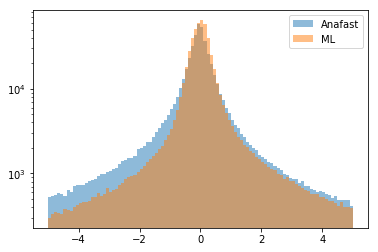

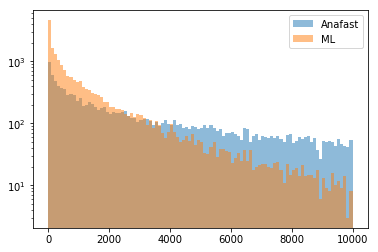

In [13]:
figure()
a=hist(np.ravel(expcls_test[:,2:]-mycls_test[:,2:]), bins=100, range=[-5,5], alpha=0.5, label='Anafast')
a=hist(np.ravel(result[:,2:]-mycls_test[:,2:]), bins=100, range=[-5,5], alpha=0.5, label = 'ML')
yscale('log')
legend()

ch2anafast = np.sum((expcls_test[:,2:]-mycls_test[:,2:])**2, axis=1)
ch2ML = np.sum((result[:,2:]-mycls_test[:,2:])**2, axis=1)

figure()
a=hist(ch2anafast, bins=100, range=[0,10000], alpha=0.5, label='Anafast')
a=hist(ch2ML, bins=100, range=[0,10000], alpha=0.5, label = 'ML')
yscale('log')
legend()

In [0]:
# summarize history for loss
plot(historyT.history['loss'])
plot(historyT.history['val_loss'])
title('model loss')
ylabel('loss')
xlabel('epoch')
legend(['train', 'test'], loc='upper left')
yscale('log')
show()
print(min(historyT.history['loss']), min(historyT.history['val_loss']), len(historyT.history['val_loss']))

In [0]:
from joblib import dump
import datetime
from google.colab import drive
drive.mount('/content/gdrive')

today = datetime.datetime.now().strftime('%Y%m%d_%H_%M_%S')
out_dir="/content/gdrive/My Drive/Colab Notebooks/"

np.save(out_dir + today + "_mymaps", mymaps)
np.save(out_dir + today + "_myalms", myalms)
np.save(out_dir + today + "_mycls", mycls)
np.save(out_dir + today + "_expcls", expcls)
dump(model, out_dir +  today + "_mymodel_dense_alm.joblib")

In [0]:
np.save(out_dir + today + "_loss-alm", history.history['loss'])
np.save(out_dir + today + "_val_loss-alm", history.history['val_loss'])